In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

****CODE START****

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [2]:
filenames_list = os.listdir('../input/Alcoholics/SMNI_CMI_TRAIN/Train/')

Data = pd.DataFrame({})

for file_names in tqdm(filenames_list):
    temp_df = pd.read_csv('../input/Alcoholics/SMNI_CMI_TRAIN/Train/' + file_names)
    Data = Data.append(temp_df)


100%|██████████| 468/468 [11:27<00:00,  1.47s/it]


In [3]:
Data.head(100000)

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,34,FP1,0,2.360,c,S1 obj,0,co2c0000337,0.000000
1,6,34,FP1,1,2.848,c,S1 obj,0,co2c0000337,0.003906
2,7,34,FP1,2,1.383,c,S1 obj,0,co2c0000337,0.007812
3,8,34,FP1,3,-1.546,c,S1 obj,0,co2c0000337,0.011719
4,9,34,FP1,4,-3.499,c,S1 obj,0,co2c0000337,0.015625
...,...,...,...,...,...,...,...,...,...,...
1691,1702,71,FZ,155,6.510,a,S2 match,6,co2a0000368,0.605469
1692,1703,71,FZ,156,6.022,a,S2 match,6,co2a0000368,0.609375
1693,1704,71,FZ,157,5.534,a,S2 match,6,co2a0000368,0.613281
1694,1705,71,FZ,158,5.534,a,S2 match,6,co2a0000368,0.617188


**DATA STRUCTURE DETAILS**

In [4]:
print(Data.shape)
print(Data.dtypes)

(7667712, 10)
Unnamed: 0              int64
trial number            int64
sensor position        object
sample num              int64
sensor value          float64
subject identifier     object
matching condition     object
channel                 int64
name                   object
time                  float64
dtype: object


**DATA CLEAN CHECKING**

In [5]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0.0%
trial number - 0.0%
sensor position - 0.0%
sample num - 0.0%
sensor value - 0.0%
subject identifier - 0.0%
matching condition - 0.0%
channel - 0.0%
name - 0.0%
time - 0.0%


**Dropping necessary columns **

In [6]:
Data=Data.drop(['Unnamed: 0','sensor position','name'],axis = 1) 




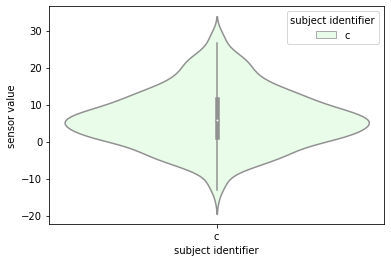

In [7]:
#Importing Data Visualization Libraries seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x="subject identifier",y="sensor value", hue="subject identifier", data=Data[:1000],color='green'); #Selecting only first 500 columns from Dataset
plt.show()

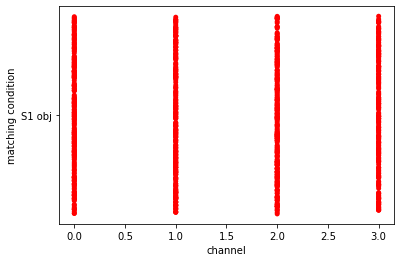

In [8]:
ax= sns.stripplot(x="channel", y="matching condition", data=Data[:1000],color="red")

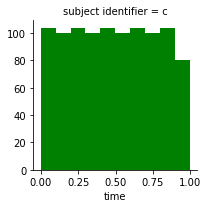

In [9]:
g = sns.FacetGrid(data=Data[:1000],col='subject identifier')
g.map(plt.hist,"time",color="green")

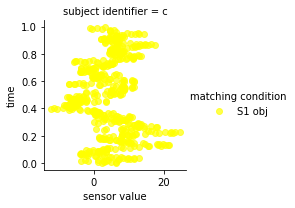

In [10]:
g = sns.FacetGrid(data=Data[:500],col='subject identifier',hue='matching condition')
g.map(plt.scatter,"sensor value","time",alpha=0.7,color="yellow")
g.add_legend();

# Plotting Pairwise Data Relationship

In [11]:
Data_sample = Data[0:100]
#Data_sample = Data_sample.drop(['trial number'],axis=1)
Data_sample.head()

,trial number,sample num,sensor value,subject identifier,matching condition,channel,time
0,34,0,2.360,c,S1 obj,0,0.000000
1,34,1,2.848,c,S1 obj,0,0.003906
2,34,2,1.383,c,S1 obj,0,0.007812
3,34,3,-1.546,c,S1 obj,0,0.011719
4,34,4,-3.499,c,S1 obj,0,0.015625


**These graph shows plots of all the selected attributes against each other**

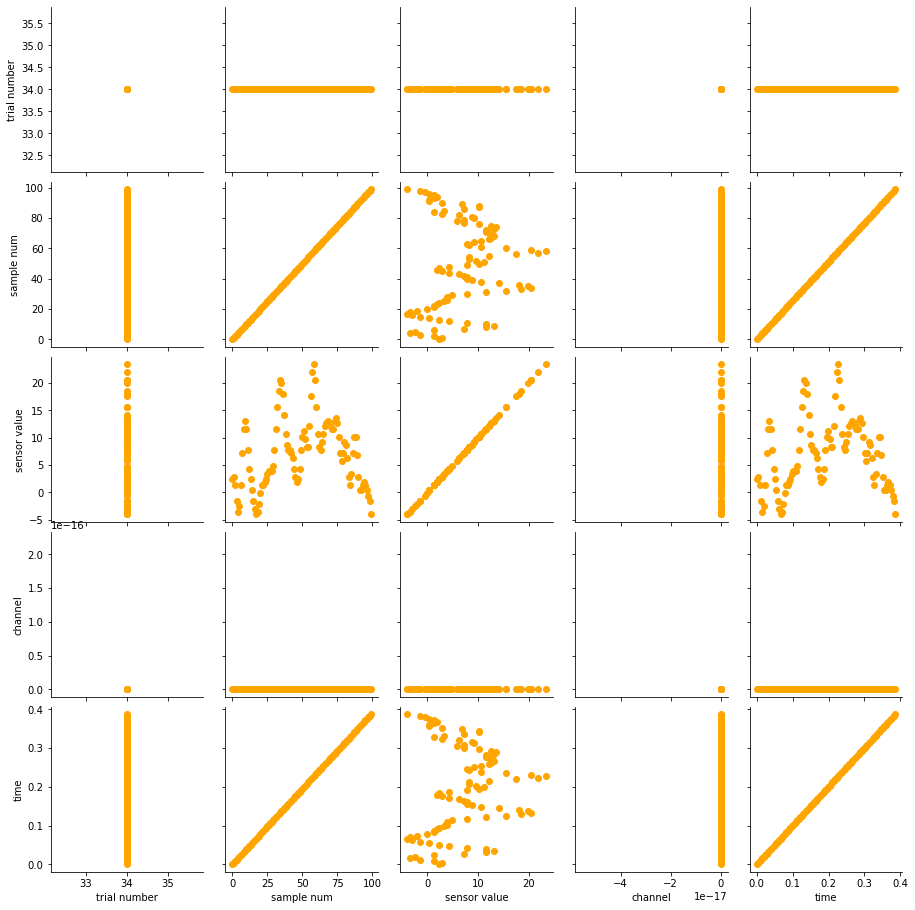

In [12]:
g = sns.PairGrid(Data_sample)
g.map(plt.scatter ,color="orange")

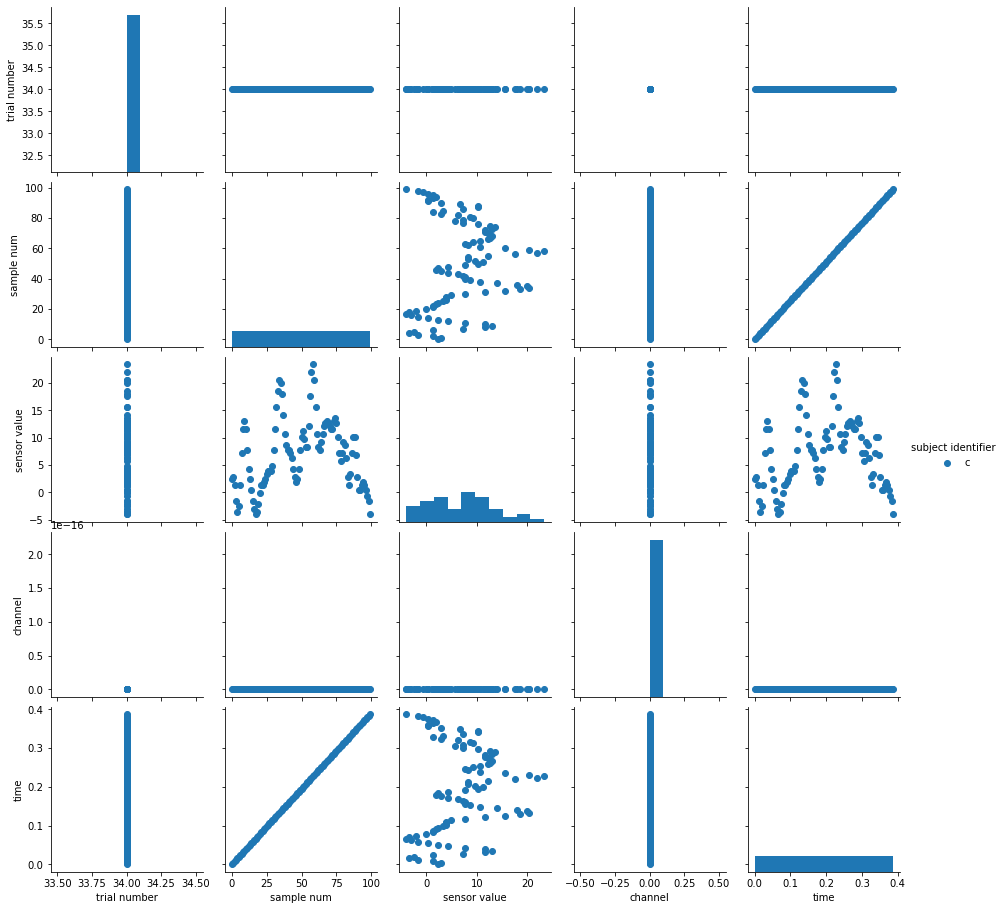

In [13]:

g = sns.PairGrid(Data_sample, hue="subject identifier")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

#  Preprocessing of data

In [14]:
#Importing LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Data['sensor position'] = le.fit_transform(Data['sensor position'])
Data['subject identifier'] = le.fit_transform(Data['subject identifier'])
Data['matching condition'] = le.fit_transform(Data['matching condition'])
#Data['name'] = le.fit_transform(Data['name'])

In [15]:
Data.head(100)

,trial number,sample num,sensor value,subject identifier,matching condition,channel,time
0,34,0,2.360,1,0,0,0.000000
1,34,1,2.848,1,0,0,0.003906
2,34,2,1.383,1,0,0,0.007812
3,34,3,-1.546,1,0,0,0.011719
4,34,4,-3.499,1,0,0,0.015625
...,...,...,...,...,...,...,...
95,34,95,1.383,1,0,0,0.371094
96,34,96,0.407,1,0,0,0.375000
97,34,97,-0.570,1,0,0,0.378906
98,34,98,-1.546,1,0,0,0.382812


# Selection of data and target

In [21]:
x= Data.iloc[:, Data.columns != 'subject identifier']
y= Data.iloc[:, 3]
# In the above code x represent data and y represent target

In [22]:
#import the necessary module to train-test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print("Shape of data training set {}".format(x_train.shape))    
print("Shape of data test set {}".format(x_test.shape)) 
print("Shape of target training set {}".format(y_train.shape)) 
print("Shape of target test set {}".format(y_train.shape)) 


Shape of data training set (5750784, 6)
Shape of data test set (1916928, 6)
Shape of target training set (5750784,)
Shape of target test set (5750784,)


# Various machine learning algorithms

1. **Logistic Regression**

[0 1 0 ... 1 0 1]
Logistic Regression Accuracy 0.5578634147970085


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



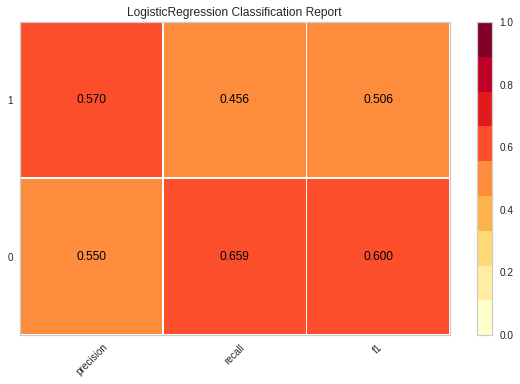

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)
print(y_pred)



#print the accuracy score
print("Logistic Regression Accuracy",accuracy_score(y_test,y_pred,normalize = True))


#code for confusion matrix
confusion_matrix(y_test,y_pred)

#from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(logmodel, classes=['0','1'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data




**2.K-Nearest Neighbors**


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure 

[0 0 0 ... 0 0 0]
K-Nearest Neighbors Accuracy 0.6680809086204594


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



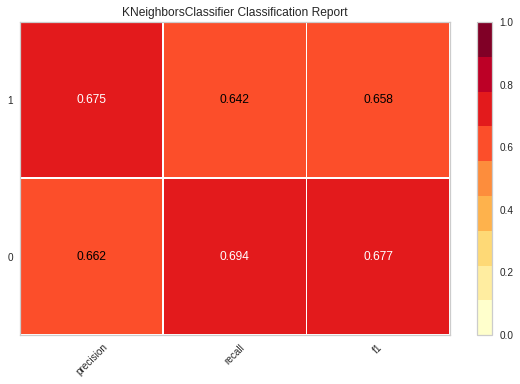

In [28]:
#import the necessary module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logmodel=KNeighborsClassifier()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)
print(y_pred)




#print the accuracy score
print("K-Nearest Neighbors Accuracy",accuracy_score(y_test,y_pred,normalize = True))


#code for confusion matrix
confusion_matrix(y_test,y_pred)

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(logmodel, classes=['0','1'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data





**3.Naive Bayes**

Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability.

[0 1 0 ... 1 0 1]
Naive Bayes Accuracy  0.5545774280515492
[[773747 189017]
 [664826 289338]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



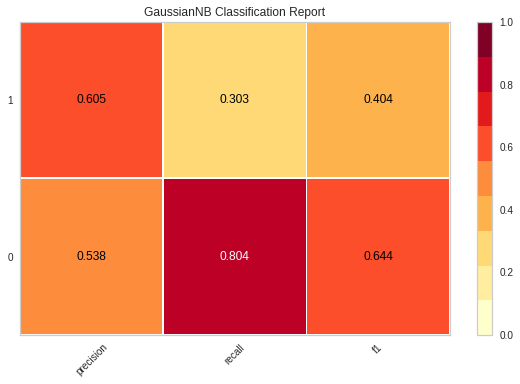

In [24]:
#import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
gnb = GaussianNB()
#train the algorithm on taining data and predict using the testing data
#Fitting the data
gnb.fit(x_train,y_train)
#prediction 
y_pred = gnb.predict(x_test)
print(y_pred)

#print the accuracy score
print("Naive Bayes Accuracy ",accuracy_score(y_test,y_pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(y_test,y_pred))



from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['0','1'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


**4.Decision Tree**

Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.

[0 1 0 ... 0 1 1]
Decision Tree Accuracy  0.5911599183693911
[[781566 181198]
 [602519 351645]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



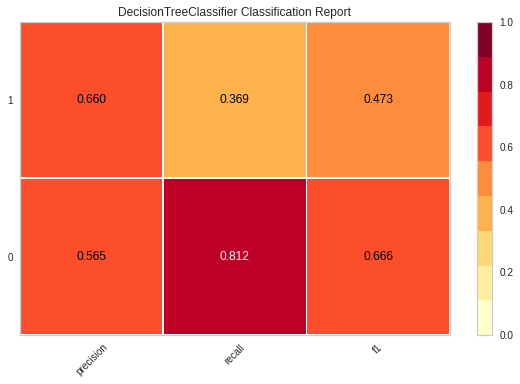

[Text(269.7, 274.065, 'X[0] <= 72.0\nentropy = 1.0\nsamples = 5750784\nvalue = [2887476, 2863308]'),
 Text(251.09999999999997, 224.235, 'X[0] <= 52.0\nentropy = 0.999\nsamples = 5578801\nvalue = [2887476, 2691325]'),
 Text(148.79999999999998, 174.405, 'X[2] <= 6.302\nentropy = 0.998\nsamples = 5222385\nvalue = [2764524, 2457861]'),
 Text(74.39999999999999, 124.57499999999999, 'X[3] <= 0.5\nentropy = 0.995\nsamples = 4587657\nvalue = [2488869, 2098788]'),
 Text(37.199999999999996, 74.745, 'X[0] <= 29.0\nentropy = 1.0\nsamples = 1644852\nvalue = [841369, 803483]'),
 Text(18.599999999999998, 24.914999999999964, 'entropy = 0.995\nsamples = 1556751\nvalue = [841369, 715382]'),
 Text(55.8, 24.914999999999964, 'entropy = 0.0\nsamples = 88101\nvalue = [0, 88101]'),
 Text(111.6, 74.745, 'X[0] <= 8.0\nentropy = 0.99\nsamples = 2942805\nvalue = [1647500, 1295305]'),
 Text(92.99999999999999, 24.914999999999964, 'entropy = 0.994\nsamples = 393266\nvalue = [179283, 213983]'),
 Text(130.2, 24.9149999

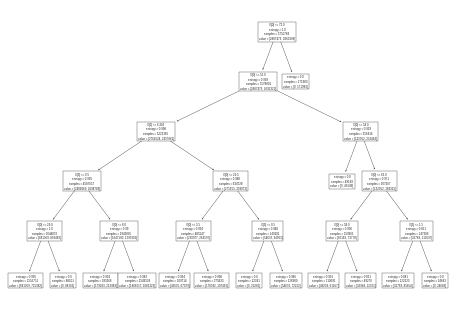

In [25]:
#import the necessary module
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
dec_tree.fit(x_train,y_train)
#prediction 
pred = dec_tree.predict(x_test)
print(pred)





#print the accuracy score
print("Decision Tree Accuracy ",accuracy_score(y_test,pred,normalize = True))

#Confusion Matrix
print(confusion_matrix(y_test,pred))





from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dec_tree, classes=['0','1'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data




from sklearn import tree
tree.plot_tree(dec_tree)

**5.Random Forest**

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

[0 1 0 ... 1 0 1]
Random Forest Accuracy  0.5812717013888888
[[829532 133232]
 [669440 284724]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



0.5812717013888888

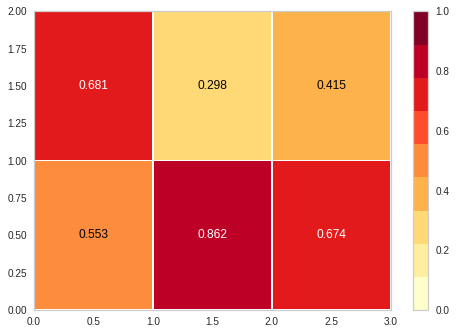

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Create an object of GaussianNB
random_forest = RandomForestClassifier(criterion="entropy", max_depth=3)
#train the algorithm on taining data and predict using the testing data
#Fitting the data
random_forest.fit(x_train,y_train)
#prediction 
pred = random_forest.predict(x_test)
print(pred)






#print the accuracy score
print("Random Forest Accuracy ",accuracy_score(y_test,pred,normalize = True))





#Confusion Matrix
print(confusion_matrix(y_test,pred))

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(random_forest, classes=['0','1'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data